In [1]:
from function_memoire import *

In [2]:
batch_size = 1000

# NCE for a 1D distribution

Data $X \sim  N(m,s)$

Noise $Y \sim  Q = \mu +\sigma N(0,1)$ with $\mu, \sigma$ fixed (in the code it is fixed at mu_unit and sigma_init)

# I) Preliminaries: several experiments to show NCE works.

## A. Data distribution's impact on NCE : $\mu_{data}=0$ , $\sigma_{data}=1$

### This experiment is to assess the variability due to data sampling

In [3]:
mu_data , sigma_data = 0 , 1
mu_noise , sigma_noise = 1 , 2

true_c= 1/(sqrt(2*pi)*sigma_data)**2 # true value of the constant

batch_size=1000 #Size of the data (recall: the size of the noise is equal to: nu*batch_size)

Error_quad = [] # List to stock  estimator's quadratic error
Variance = [] #List to stockestimator's variance 

for i in range(100):
    
    X = random.normal(mu_data, sigma_data, batch_size)
    Estim_c = []
    
    for j in range(100):
        
        grad=NCEDescent1D(X, batch_size, mu_data, sigma_data,mu_noise , sigma_noise, nu=1)
        Estim_c.append(grad.cte)
        
    x = np.mean((np.array(Estim_c) - true_c)**2) #Quadratic error's computation
    Error_quad.append(x)
    
    Variance.append(np.var(Estim_c)) # Estimator's variance computation
    
    

        
    

=============== Data distribution's impact on estimation for 100 iteration ===============
-------------------------------------  -----------
Estimator's Quadratic error average =  0.0576585
Estimator variance's average           7.29748e-05
-------------------------------------  -----------


Text(0.5, 1.0, 'Histogram of the quadratic error for different sample')

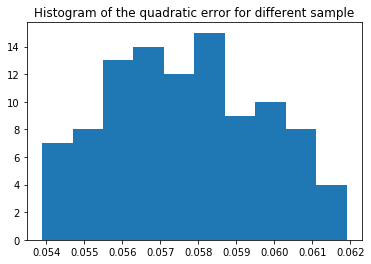

In [4]:
table=[["Estimator's Quadratic error average =",np.mean(Error_quad)],["Estimator variance's average",np.mean(Variance)] ]
print("=============== Data distribution's impact on estimation for 100 iteration ===============")
print(tabulate(table))
plt.hist(Error_quad )
plt.title("Histogram of the quadratic error for different sample")

##### Remarks:

* Estimator's variance and  quadratic error average for 100 iterations are very low. Then  NCE is not sensitive to data distribution.
* It confirms the perturbation which can occur during our analysis is not provided by the dataset.


## B. Lets experiment NCE with different values of $\mu_{data}, \sigma_{data} , \mu_{noise}, \sigma_{noise}$ 

### noise distribution = data distribution: 

In [5]:
mu_data, sigma_data  = 5,10
mu_noise, sigma_noise = 5,10

X = random.normal(mu_data, sigma_data, batch_size) # Dataset

true_c= 1/(sqrt(2*pi)*sigma_data) # True constant's value

Estim = []

for i in range(100):
    
    C = NCEDescent1D(X, batch_size, mu_data, sigma_data, mu_noise, sigma_noise , nu=1)
    Estim.append(C.cte)
    
Quad_err =np.mean((np.array(Estim) - true_c)**2) 
Bias=np.mean(Estim) - true_c
Variance= np.var(Estim)
    

### Noise distribution's parameters quite similars to those of data  

In [6]:
mu_data, sigma_data  = 5,10
mu_noise, sigma_noise = 3,8

true_c1= 1/(sqrt(2*pi)*sigma_data) # True constant's value

X = random.normal(mu_data, sigma_data, batch_size) # Dataset

Estim1 = []

for i in range(100):
    
    C = NCEDescent1D(X, batch_size, mu_data, sigma_data, mu_noise, sigma_noise , nu=1)
    Estim1.append(C.cte)
    
Quad_err1 =np.mean((np.array(Estim1) - true_c1)**2) 
Bias1=np.mean(Estim1) - true_c
Variance1= np.var(Estim1)


### Noise distribution's parameters very differents to those of data

In [7]:
mu_data, sigma_data  = 5,10
mu_noise, sigma_noise = 2,4

true_c2= 1/(sqrt(2*pi)*sigma_data) # True constant's value

X = random.normal(mu_data, sigma_data, batch_size) # Dataset

Estim2 = []

for i in range(100):
    
    C = NCEDescent1D(X, batch_size, mu_data, sigma_data, mu_noise, sigma_noise , nu=1)
    Estim2.append(C.cte)
    
Quad_err2 =np.mean((np.array(Estim2) - true_c2)**2) 
Bias2=np.mean(Estim2) - true_c
Variance2= np.var(Estim2)

/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


### Noise and Data not belonging to same ditribution family ( noise$\sim$ T(5))

In [8]:
mu_data, sigma_data  = 5,10
n = 5 # degrees of freedom for the student law

true_c3= 1/(sqrt(2*pi)*sigma_data)**2 # True constant's value

X = random.normal(mu_data, sigma_data, batch_size)

Estim3 = []

for i in range(100):
    
    C = NCEDescent1D_T(X, batch_size, mu_data, sigma_data, n , nu=1)
    Estim3.append(C.cte)
    
Quad_err3 = np.mean((np.array(Estim3) - true_c3)**2) 
Bias3 = np.mean(Estim3) - true_c
Variance3 = np.var(Estim3)

In [9]:
Table=[["True value", true_c],["Mean", np.mean(Estim)],["Estimator's Quadratic error ", Quad_err],["Estimator variance's ",Variance],
       [ "Estimator's Bias", Bias] ,["Normalized Bias", Bias/true_c]]
table1=[["True value", true_c1],["Mean", np.mean(Estim1)],["Mean Square Error ", Quad_err1],["Variance ",Variance1],
       [ "Estimator's Bias", Bias1],["Normalized Bias", Bias1/true_c1] ]
table2=[["True value", true_c2],["Mean", np.mean(Estim2)],["Mean Square Error ", Quad_err2],["Variance ",Variance2],
       [ "Bias", Bias2],["Normalized Bias", Bias2/true_c2] ]
table3=[["True value", true_c3],["Mean", np.mean(Estim3)],["Mean Square Error", Quad_err3],["Variance ",Variance3],
       [ "Bias", Bias3],["Normalized Bias", Bias3/true_c3]]
print("=====================  Case: data = noise  ===================== ")
print(tabulate(Table))
print("======= Case: noise's parameters slightly differents from data ======= ")
print(tabulate(table1))
print("======= Case: noise's parameters very differents from data ======= ")
print(tabulate(table2))
print("======= Case: noise's and data distribution not same family =======")
print(tabulate(table3))

=====================  Case: data = noise  ===================== 
---------------------------  -----------
True value                   0.0398942
Mean                         0.0398942
Estimator's Quadratic error  1.2326e-32
Estimator variance's         0
Estimator's Bias             1.11022e-16
Normalized Bias              2.78292e-15
---------------------------  -----------
======= Case: noise's parameters slightly differents from data ======= 
-----------------  -----------
True value         0.0398942
Mean               0.0401558
Mean Square Error  1.02186e-07
Variance           3.37425e-08
Estimator's Bias   0.000261617
Normalized Bias    0.00655777
-----------------  -----------
======= Case: noise's parameters very differents from data ======= 
-----------------  ------------
True value          0.0398942
Mean                0.0384803
Mean Square Error   2.20361e-06
Variance            2.04489e-07
Bias               -0.0014139
Normalized Bias    -0.0354413
-----------------  ---

#### Remarks:
For all the cases we explored, We can remark NCE is precise: 
* Low Bias
* Low Variance
* Low MSE



#### Warning:

We cannot choose a $\mu_{noise}$ too far from $\mu_{data}$ for numerical reasons. Indeed in our logistic function appears the ratio: $\frac{ln(p_{data})}{ln(p_{noise})}$ where $p_{noise}$  and $p_{data}$ are respectively the noise and data pdf. Then noise pdf's support needs to bee larger than the one of the data to allow ratio to be defined. 
From an analytical point of vue as we are dealing with two gaussians pdf no problems should occur because  their support is R. However, tails distributions collapse very quickly to zero depending on standard deviation's value.

It's also the reason why we choose to take student distribution for the case: noise and data not belonging to the same distribution.

# II) Noise distribution's impact:

Gutmann et al. shows that noise distribution has a non negligible impact on constant's estimation.
He advocates to choose a noise distribution which gathers the following features: 
* Easy to simulate
* With a large sample size
* Close to the Data Distribution

First, lets see whats is the noise's sample size effect( i.e $\nu$'s value on constant's estimation).
Then, we are going to see what is the impact of a close noise distribution.

## A. Impact of $\nu=\frac{Noise\ sample\ size}{Data\ sample\ size}$ on the data

### Case 1: noise = data

In [10]:
mu_data, sigma_data  = 0,1
mu_noise, sigma_noise = 0,1
true_c= 1/(sqrt(2*pi)*sigma_data)**2

Estim_c2=[] #list of estimators for each iteration
Var2=[]# list of estimators for each iteration
Quad_err_2=[] #list of quadratic error for each iteration
Bias_2 = [] #list of quadratic error for each iteration

random.seed(5)

X = random.normal(mu_data, sigma_data, 1000)
x= np.arange(1, 100 , 5)
for i in x:

    for j in range(75): # 100 iteration of Gan
        
        C = NCEDescent1D(X,1000,mu_data, sigma_data,mu_noise, sigma_noise, nu = int(i))
        Estim_c2.append(C.cte)
    
    
    x = np.mean((np.array(Estim_c2)-1/(sqrt(2*pi)*sigma_data))**2)
    Quad_err_2.append(x)
    Var2.append(np.var(Estim_c2))
    Estim_c2 = []
    Bias_2.append(np.mean(Estim_c2)-true_c)
    

/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'log Quadratic Error ')

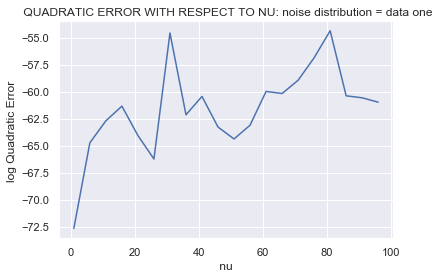

In [136]:
plt.plot(np.arange(1, 100 , 5), np.log((np.array(Quad_err_2))))
plt.title(" QUADRATIC ERROR WITH RESPECT TO NU: noise distribution = data one")
plt.xlabel(" nu ")
plt.ylabel("log Quadratic Error ")

MSE values in this case are so low that we cannot conclude on the impact of nu

### Case 2: noise slightly different from data

In [123]:
mu_data, sigma_data  = 0,1
mu_noise, sigma_noise = 2,1
true_c= 1/(sqrt(2*pi)*sigma_data)**2

Estim_c3=[] #list of estimators for each iteration
Var3=[]# list of estimators for each iteration
Quad_err_3=[] #list of quadratic error for each iteration
Bias_3 = [] #list of quadratic error for each iteration

random.seed(5)

X = random.normal(mu_data, sigma_data, 1000)
x= np.arange(1, 100 , 5)
for i in x:

    for j in range(100):
        
        C = NCEDescent1D(X,1000,mu_data, sigma_data,mu_noise, sigma_noise, nu = int(i))
        Estim_c3.append(C.cte)
    
    
    x = np.mean((np.array(Estim_c3)-1/(sqrt(2*pi)*sigma_data))**2)
    Quad_err_3.append(x)
    Var3.append(np.var(Estim_c3))
    Bias_3.append(np.mean(Estim_c3)-true_c)
    Estim_c3 = []

Text(0, 0.5, 'log Quadratic Error ')

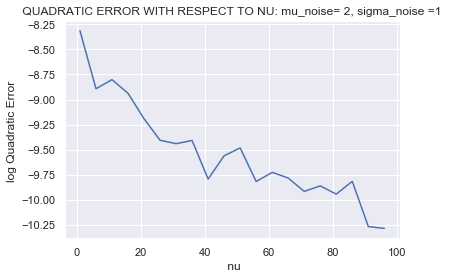

In [126]:
plt.plot(np.arange(1, 100 , 5), np.log(np.array(Quad_err_3)))
plt.title(" QUADRATIC ERROR WITH RESPECT TO NU: mu_noise= 2, sigma_noise =1 ")
plt.xlabel(" nu")
plt.ylabel("log Quadratic Error ")

We also observe a decrease of the quadratic error whith respect to $\mu$

In [ ]:
plt.plot(np.arange(1, 100 , 5), np.log(np.array(Quad_err_3)))
plt.title(" QUADRATIC ERROR WITH RESPECT TO NU: mu_noise= 2, sigma_noise =1 ")
plt.xlabel(" nu")
plt.ylabel("log Quadratic Error ")

### Case 3: Noise much different from data

In [133]:
mu_data, sigma_data  = 0,1
mu_noise, sigma_noise = 4,1
true_c= 1/(sqrt(2*pi)*sigma_data)**2

Estim_c4=[] #list of estimators for each iteration
Var4=[]# list of estimators for each iteration
Quad_err_4=[] #list of quadratic error for each iteration
Bias_4 = [] #list of quadratic error for each iteration

random.seed(5)

X = random.normal(mu_data, sigma_data, 1000)
x= np.arange(1, 100 , 5)
for i in x:

    for j in range(100):
        
        C = NCEDescent1D(X,1000,mu_data, sigma_data,mu_noise, sigma_noise, nu = int(i))
        Estim_c4.append(C.cte)
    
    
    x = np.mean((np.array(Estim_c4)-1/(sqrt(2*pi)*sigma_data))**2)
    Quad_err_4.append(x)
    Var4.append(np.var(Estim_c4))
    Bias_4.append(np.mean(Estim_c4)-true_c)
    Estim_c4 = []

Text(0, 0.5, 'log Quadratic Error ')

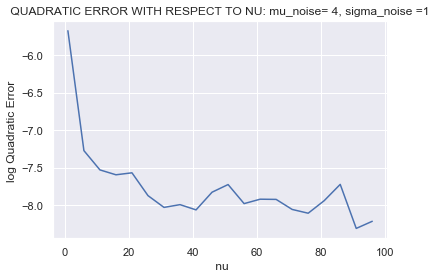

In [134]:
plt.plot(np.arange(1, 100 , 5), np.log(np.array(Quad_err_4)))
plt.title(" QUADRATIC ERROR WITH RESPECT TO NU: mu_noise= 4, sigma_noise =1 ")
plt.xlabel(" nu")
plt.ylabel("log Quadratic Error ")

We observe a monotonicity for the convergence of the varicance as $\nu$ increases 

### Case 4: Noise $\sim$T(5)

In [3]:
mu_data, sigma_data  = 0,1
n=20
batch_size = 1000

random.seed(5)

true_c= 1/(sqrt(2*pi)*sigma_data)**2

X = random.normal(mu_data, sigma_data, 1000)

x= np.arange(1, 100 , 5) #

Estim_c_1 = [] # list of the estimator
Var_1 = [] # list of the variance
Quad_err_1 = [] #list of the qudratic error
Bias_1 = [] # list of bias

for i in x:

    for j in range(75): # we run 75 times NCE
        C = NCEDescent1D_T(X,1000, mu_data, sigma_data, n , nu = int(i))
        Estim_c_1.append(C.cte)
    
    # we fill all the list described above
    x = np.mean((np.array(Estim_c_1) - true_c)**2)
    Quad_err_1.append(x)
    Var_1.append(np.var(Estim_c_1))
    Bias_1.append(np.mean(Estim_c_1)-true_c)
    # Wa empty the estimators' list in order to deal with an other iteration
    Estim_c_1 = []
    


Text(0, 0.5, 'log Quadratic Error ')

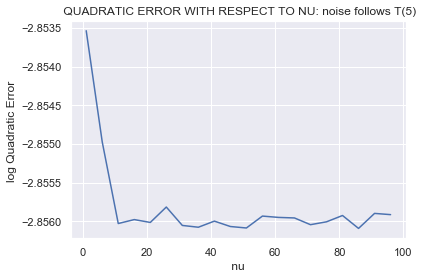

In [6]:
#plt.scatter( np.arange(1, 100 , 5) , 10e20*np.array(Var_1))
sns.set(style='darkgrid')
plt.plot( np.arange(1, 100 , 5) , np.log(np.array(Quad_err_1)) )
plt.title(" QUADRATIC ERROR WITH RESPECT TO NU: noise follows T(5)")
plt.xlabel(" nu ")
plt.ylabel("log Quadratic Error ")


We observe a monotonicity for the convergence of the varicance as $\nu$ increases 

#### Remarks:

* We observe that for all noise distribution different from the data when $\nu \right arrow \infty$ the Men Square error decreases.
* This is not the case when $p_{noise}=p_{data}$ however the log MSE reaches its lowest point.



## B. KL divergence as crtierion for proximity between noise and data

### Student Case:

In [18]:
mu_data , sigma_data = 0, 1
X=np.random.normal(0,1,1000)
random.seed(5)
true_c= 1/(sqrt(2*pi)*sigma_data)

Estim_t=[]
Variance_t=[]
Quad_err_t=[]

KL_t=[]

for i in np.linspace(4,60,30):
    
    for j in range(100):
        
        C = NCEDescent1D_T(X, len(X), mu_data,sigma_data, i, nu = 1)
        Estim_t.append(C.cte)
        
    Variance_t.append(np.var(Estim_t))
    Quad_err_t.append(np.mean((np.array(Estim_t) - true_c)**2))
    KL_t.append(kl_divergence(norm.pdf(X,0,1),pn_t(X,i)))


/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  """


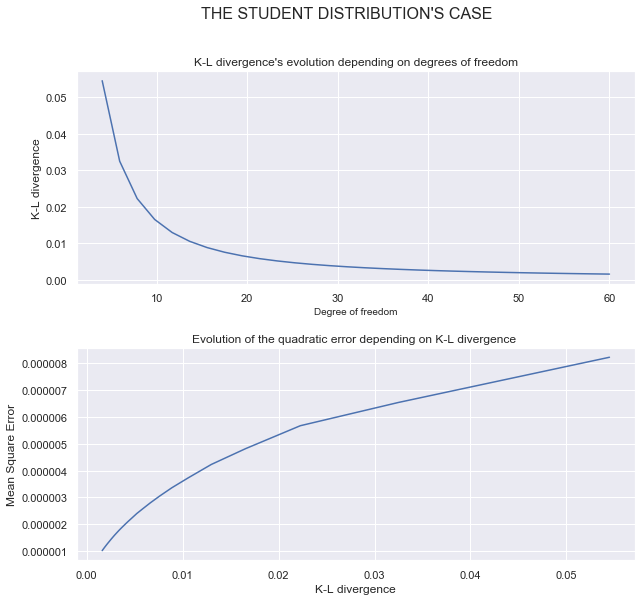

In [19]:
sns.set(style='darkgrid')
fig_t, axs_t = plt.subplots(2,figsize=(10,9), constrained_layout=True)
#fig_t.tight_layout()

fig_t.subplots_adjust(top=0.88,wspace = 0.2,hspace = 0.3)
fig_t.suptitle("THE STUDENT DISTRIBUTION'S CASE", size=16)

### Plot 1
axs_t[0].set_title("K-L divergence's evolution depending on degrees of freedom")
axs_t[0].set_xlabel("Degree of freedom",size=10)
axs_t[0].set_ylabel("K-L divergence")
axs_t[0].plot(np.linspace(4,60,30),KL_t)

### Plot 2
axs_t[1].set_title("Evolution of the quadratic error depending on K-L divergence ")
axs_t[1].set_xlabel("K-L divergence")
axs_t[1].set_ylabel("Mean Square Error")
axs_t[1].plot(KL_t,Quad_err_t)

#### Remarks:

* We know the student law converge to a Gaussian ditribution as its degrees of freedom increase. This convergence is characterized by the first graph.
* Moreover, we can see there is a positive correlation between KL-divergence and Quadratic error of the estimation. Thus we are tempted to say that in order to perform our estimation we need to choose a noise ditribution close to the data one. However we have to keep in mind the student case is particular as we have a convergence in law. Lets see what happens when we try to extend this assumption to others law such as the gaussian one.

### Gaussian case

In [33]:
mu_data , sigma_data = 0,1
random.seed(5)
batch_size=1000

X = random.normal(mu_data, sigma_data, 1000)
KL_0 = []

L_mu = np.arange(-4, 5,1)
L_sigma = np.arange(0.5,7,0.25)

for i in L_mu:
    
    for j in L_sigma:
        
        KL_0.append(kl_divergence((1/(sqrt(2*pi)*sigma_data))*pm0(X,mu_data,sigma_data),pn(X, i, j)))

KL=np.array(KL_0).reshape(len(L_mu),len(L_sigma))
def f_kl(i,k):
    return KL[np.argwhere(L_mu==i)[0][0], np.argwhere(L_sigma==k)[0][0]]


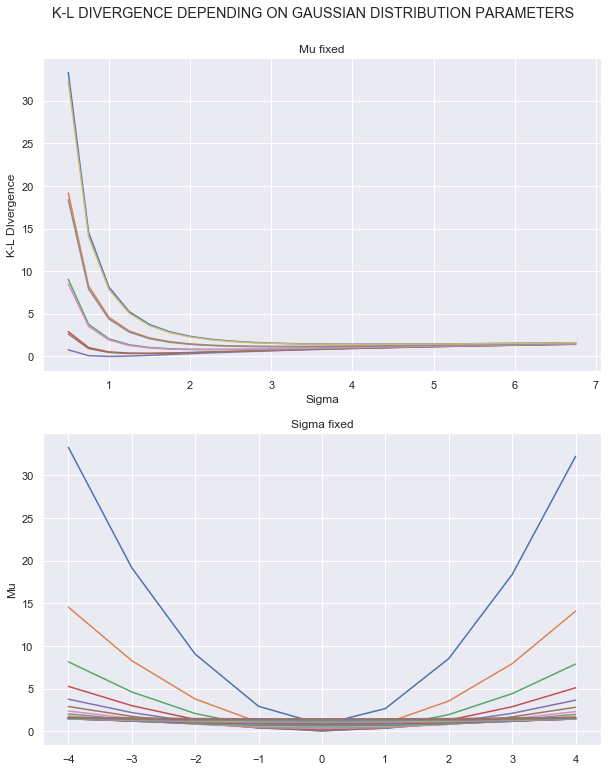

In [34]:
sns.set(style='darkgrid')

fig1, axs = plt.subplots(2, figsize=(10,12))

fig1.suptitle("K-L DIVERGENCE DEPENDING ON GAUSSIAN DISTRIBUTION PARAMETERS")
fig1.subplots_adjust(top=0.92)

axs[0].set_title('Mu fixed')
axs[0].set_ylabel('K-L DIvergence')
axs[0].set_xlabel('Sigma')
axs[0].plot(L_sigma,np.transpose(KL))

axs[1].set_title('Sigma fixed')
axs[1].set_ylabel('K-L DIvergence')
axs[1].set_ylabel('Mu')
axs[1].plot( L_mu , KL)

plt.show()

Text(0.5, 0.98, ' K-L Divergence depending on mu and sigma ')

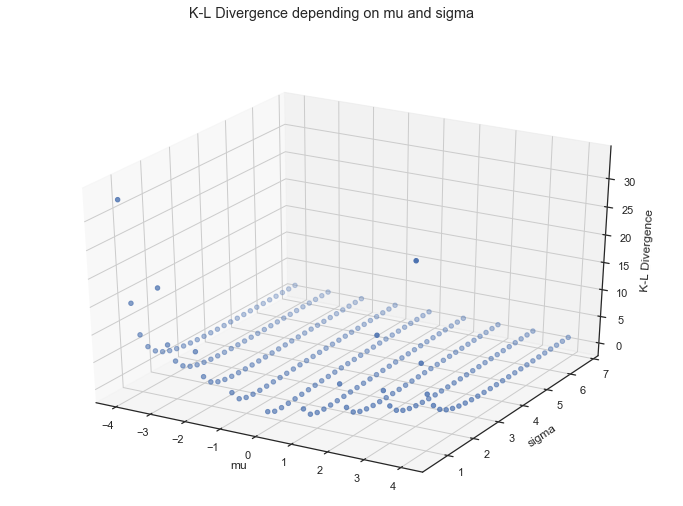

In [35]:
from mpl_toolkits import mplot3d

%matplotlib inline 

sns.set(style='white')

fig2 = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')


#for i in range(10):
xline = L_mu
yline = L_sigma
zline = [[f_kl(x,y) for x in xline] for y in yline]

xline, yline = np.meshgrid(xline, yline)

ax.scatter3D(xline, yline, zline, 'gray')
ax.set_xlabel('mu')
ax.set_ylabel('sigma')
ax.set_zlabel('K-L Divergence')

plt.suptitle(" K-L Divergence depending on mu and sigma ")
plt.adjust()

#ax.view_init(56, angle)
    

In [23]:
#Lets compute the MSE for different values of mu and sigma

mu_data, sigma_data = 0,1

estim = []
MSE = [] #erreur quadratique de la constante
true_c = 1/(sqrt(2*pi)*sigma_data)
KL_0 = []
Var_=[]

np.random.seed(5)

X = random.normal(mu_data, sigma_data, batch_size)



L_mu = np.arange(-4, 5,1)
L_sigma = np.arange(0.5,7,0.25)

for k in L_mu:
    
    for i in L_sigma:
        
        print("MU =", k, "SIGMA=",i)
        
        for j in range(100):
            
            grad = NCEDescent1D(X, len(X), mu_data, sigma_data, k , i ,nu=1)
            estim.append(grad.cte)
            
        
        x = np.mean((np.array(estim) - true_c)**2)
        MSE.append(x)
        Var_.append(np.var(estim))
        pm = norm.pdf(X, mu_data, sigma_data)
        KL_0.append(kl_divergence(pm, pn(X, k, i)))
        
        estim=[]
        


MU = -4 SIGMA= 0.5


/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


MU = -4 SIGMA= 0.75
MU = -4 SIGMA= 1.0
MU = -4 SIGMA= 1.25
MU = -4 SIGMA= 1.5
MU = -4 SIGMA= 1.75
MU = -4 SIGMA= 2.0
MU = -4 SIGMA= 2.25
MU = -4 SIGMA= 2.5
MU = -4 SIGMA= 2.75


/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/nicolas/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


MU = -4 SIGMA= 3.0
MU = -4 SIGMA= 3.25
MU = -4 SIGMA= 3.5
MU = -4 SIGMA= 3.75
MU = -4 SIGMA= 4.0
MU = -4 SIGMA= 4.25
MU = -4 SIGMA= 4.5
MU = -4 SIGMA= 4.75
MU = -4 SIGMA= 5.0
MU = -4 SIGMA= 5.25
MU = -4 SIGMA= 5.5
MU = -4 SIGMA= 5.75
MU = -4 SIGMA= 6.0
MU = -4 SIGMA= 6.25
MU = -4 SIGMA= 6.5
MU = -4 SIGMA= 6.75
MU = -3 SIGMA= 0.5
MU = -3 SIGMA= 0.75
MU = -3 SIGMA= 1.0
MU = -3 SIGMA= 1.25
MU = -3 SIGMA= 1.5
MU = -3 SIGMA= 1.75
MU = -3 SIGMA= 2.0
MU = -3 SIGMA= 2.25
MU = -3 SIGMA= 2.5
MU = -3 SIGMA= 2.75
MU = -3 SIGMA= 3.0
MU = -3 SIGMA= 3.25
MU = -3 SIGMA= 3.5
MU = -3 SIGMA= 3.75
MU = -3 SIGMA= 4.0
MU = -3 SIGMA= 4.25
MU = -3 SIGMA= 4.5
MU = -3 SIGMA= 4.75
MU = -3 SIGMA= 5.0
MU = -3 SIGMA= 5.25
MU = -3 SIGMA= 5.5
MU = -3 SIGMA= 5.75
MU = -3 SIGMA= 6.0
MU = -3 SIGMA= 6.25
MU = -3 SIGMA= 6.5
MU = -3 SIGMA= 6.75
MU = -2 SIGMA= 0.5
MU = -2 SIGMA= 0.75
MU = -2 SIGMA= 1.0
MU = -2 SIGMA= 1.25
MU = -2 SIGMA= 1.5
MU = -2 SIGMA= 1.75
MU = -2 SIGMA= 2.0
MU = -2 SIGMA= 2.25
MU = -2 SIGMA= 2.5
MU = -

In [24]:
L_mu = np.arange(-4, 5,1)
L_sigma = np.arange(0.5,7,0.25)
MSE1=np.array(MSE).reshape(len(L_mu),len(L_sigma))
Var_1=np.array(Var_).reshape(len(L_mu),len(L_sigma))

def f_VAR(i,k):
    return Var_1[np.argwhere(L_mu==i)[0][0], np.argwhere(L_sigma==k)[0][0]]

def f_MSE(i,k):
    return MSE1[np.argwhere(L_mu==i)[0][0], np.argwhere(L_sigma==k)[0][0]]



Text(0.5, 0, 'Quadratic error')

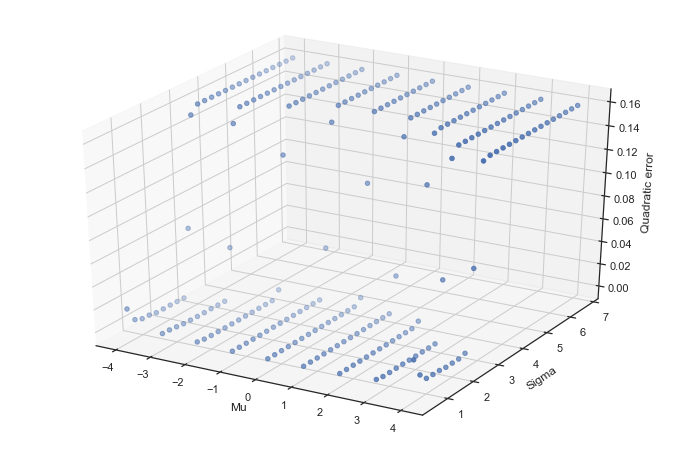

In [25]:
from mpl_toolkits import mplot3d

%matplotlib inline 

sns.set(style='white')

fig2 = plt.figure(figsize=(12,8))
fig2.suptitle(" QUADRATIC ERROR WITH RESPECT TO MU AND SIGMA")
ax = plt.axes(projection='3d')


#for i in range(10):
xline = L_mu
yline = L_sigma
zline = [[f_MSE(x,y) for x in xline] for y in yline]

xline, yline = np.meshgrid(xline, yline)

ax.scatter3D(xline, yline, zline, 'gray')
ax.set_xlabel('Mu')
ax.set_ylabel('Sigma')
ax.set_zlabel('Quadratic error')

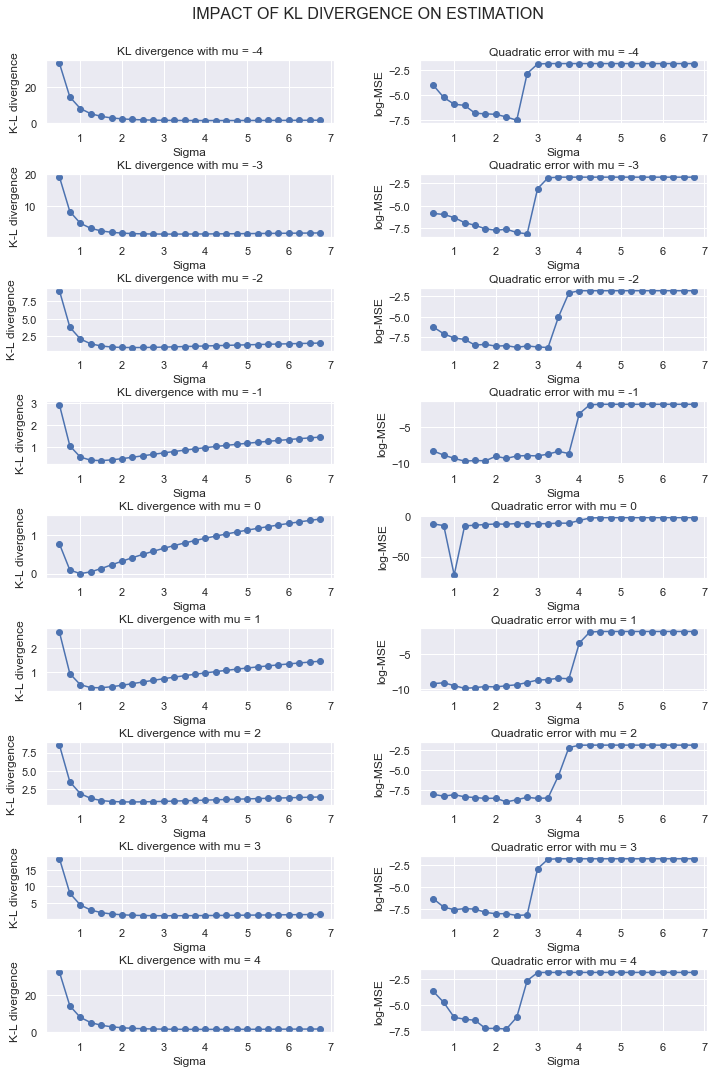

In [38]:
error_quad_bis1 = np.array(MSE1).reshape(len(L_mu),len(L_sigma))

sns.set(style="darkgrid")
opt1=[]
fig5, axs5 = plt.subplots(9,2,figsize=(10,15))
fig5.tight_layout()

j=0

#for i in np.hstack((-4,np.arange(0,5,1))):
for i in np.arange(-4, 5,1):
    
    
    axs5[j,0].set_title("KL divergence with mu = "+ str(i))
    axs5[j,0].scatter(L_sigma,KL[j])
    axs5[j,0].plot(L_sigma,KL[j])
    axs5[j,0].set_xlabel('Sigma')
    axs5[j,0].set_ylabel('K-L divergence')

    
    axs5[j,1].set_title("Quadratic error with mu = "+ str(i) )
    axs5[j,1].scatter( L_sigma,np.log(error_quad_bis1[j]))
    axs5[j,1].plot( L_sigma,np.log(error_quad_bis1[j]))
    axs5[j,1].set_xlabel('Sigma')
    axs5[j,1].set_ylabel('log-MSE')
    opt1.append(L_sigma[ np.argmin(error_quad_bis1[i,:10])])
    j=j+1

fig5.suptitle("IMPACT OF KL DIVERGENCE ON ESTIMATION", size=16)
fig5.subplots_adjust(top= 0.93, wspace=0.3 ,hspace=0.8)
plt.show()



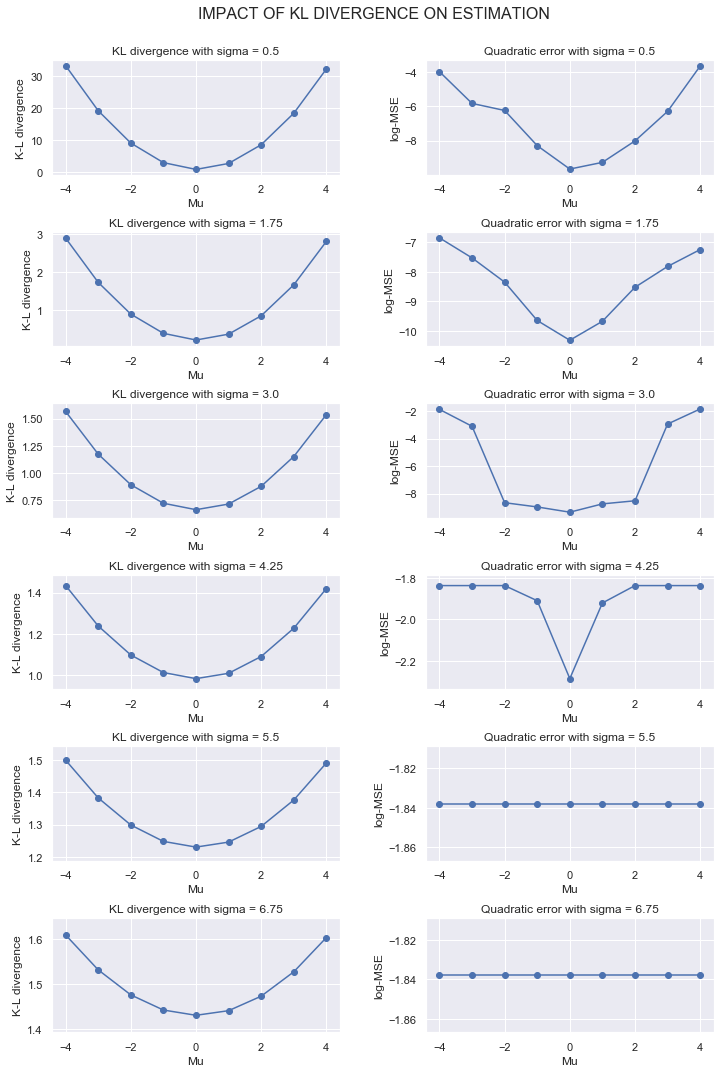

In [121]:
error_quad_bis1 = np.array(MSE1).reshape(len(L_mu),len(L_sigma))

sns.set(style="darkgrid")
opt1=[]
fig5, axs5 = plt.subplots(len(np.arange(0.5,8,1.25)),2,figsize=(10,15))
fig5.tight_layout()
fig5.suptitle("IMPACT OF KL DIVERGENCE ON ESTIMATION", size=16)
fig5.subplots_adjust(top= 0.93, wspace=0.3 ,hspace=0.5)
j=0

#for i in np.hstack((-4,np.arange(0,5,1))):
for i in np.arange(0.5,8,1.25):
    
    s= np.argwhere(L_sigma==i)[0][0]
    
    axs5[j,0].set_title("KL divergence with sigma = "+ str(i))
    axs5[j,0].scatter(L_mu,KL[:,s])
    axs5[j,0].plot(L_mu,KL[:,s])
    axs5[j,0].set_xlabel('Mu')
    axs5[j,0].set_ylabel('K-L divergence')

    
    axs5[j,1].set_title("Quadratic error with sigma = "+ str(i) )
    axs5[j,1].scatter( L_mu , np.log(error_quad_bis1[:,s]))
    axs5[j,1].plot( L_mu , np.log(error_quad_bis1[:,s]))
    axs5[j,1].set_xlabel('Mu')
    axs5[j,1].set_ylabel('log-MSE')
   # opt1.append(L_sigma[ np.argmin(error_quad_bis1[i,:10])])
    j=j+1


plt.show()



KL divergence doesn't necessarily seem to be a good criterion to find a better estimation quality as the above graph shows us

####  Remarks :

* NCE is a classification problem. Therefore it's more relevant to speak about "data proximity" rather than distribution one.

* This remark is enlighted by the graphs above. Indeed, we see that KL divergence variations and quadratic error variations does not necessarily coincide. It seems at first sight disappointed. However, just remember NCE is based on logistic regression. So a high confusion  between data and noise makes discrimination between their realisations more difficult. Then, according to Gutman's intuition, it leads for discriminator to learn more about the two distributions. Hence a good way to get more information about data distribution and so about the constant value deals with "data proximity" rather than "Distribution proximity".

## C. NCE is a classification problem: confusion between noise and data samples

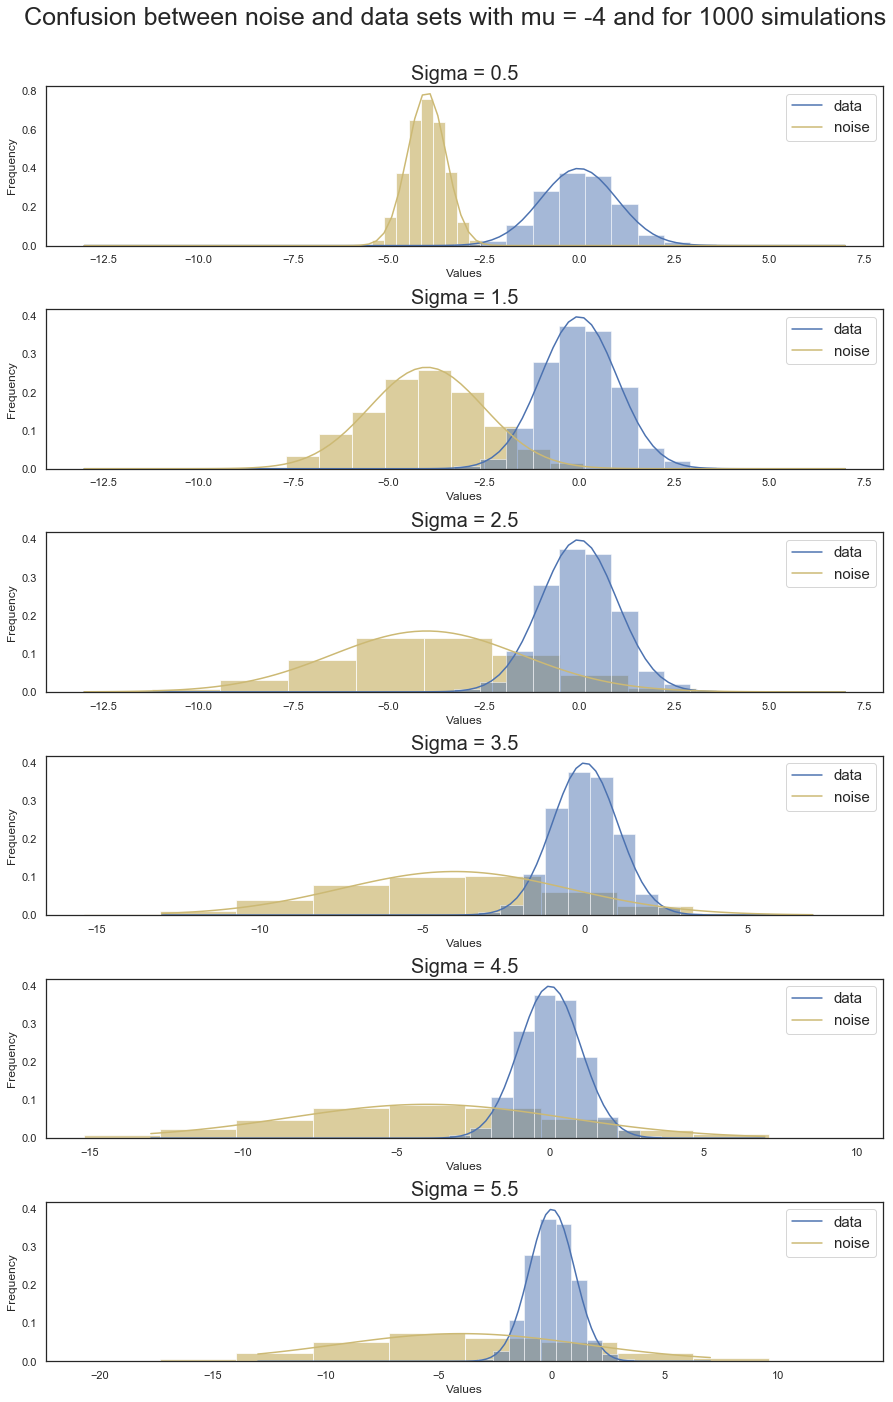

In [57]:
I= np.linspace(-13,7,100)
sns.set(style ="white")
np.random.seed(5)
fig_conf, axs_conf = plt.subplots(len(np.arange(0.5,6,1)),figsize=(15,22))

size_sample=1000
mu=-4
L = np.random.normal(0,1,size_sample)
#fig.tight_layout()
fig_conf.suptitle(" Confusion between noise and data sets with mu = " + str(mu) + " and for "  +str(size_sample) +" simulations", size= 25)
fig_conf.subplots_adjust(top = 0.93,hspace=0.4)
L_sigma_reduced=[0.5,1,2,3,4]

j=0
for i in np.arange(0.5,6,1):
    
    axs_conf[j].set_title("Sigma = "+str(i), size= 20)
    axs_conf[j].plot(I, norm.pdf(I,0,1), '-b', label='data')
    axs_conf[j].plot(I, norm.pdf(I,mu,i),'-y',label="noise")
    #axs[np.argwhere(L_sigma==i)[0][0]].plot(np.random.normal(3,i,16),[0]*16)
    axs_conf[j].hist(np.random.normal(mu,i,size_sample),density=True,alpha=0.7,color='y')
    axs_conf[j].hist(L,density=True,color='b', alpha=0.5)
    axs_conf[j].legend(loc="upper right",prop={'size': 15})
    axs_conf[j].set_ylabel("Frequency")
    axs_conf[j].set_xlabel("Values")
    j=j+1


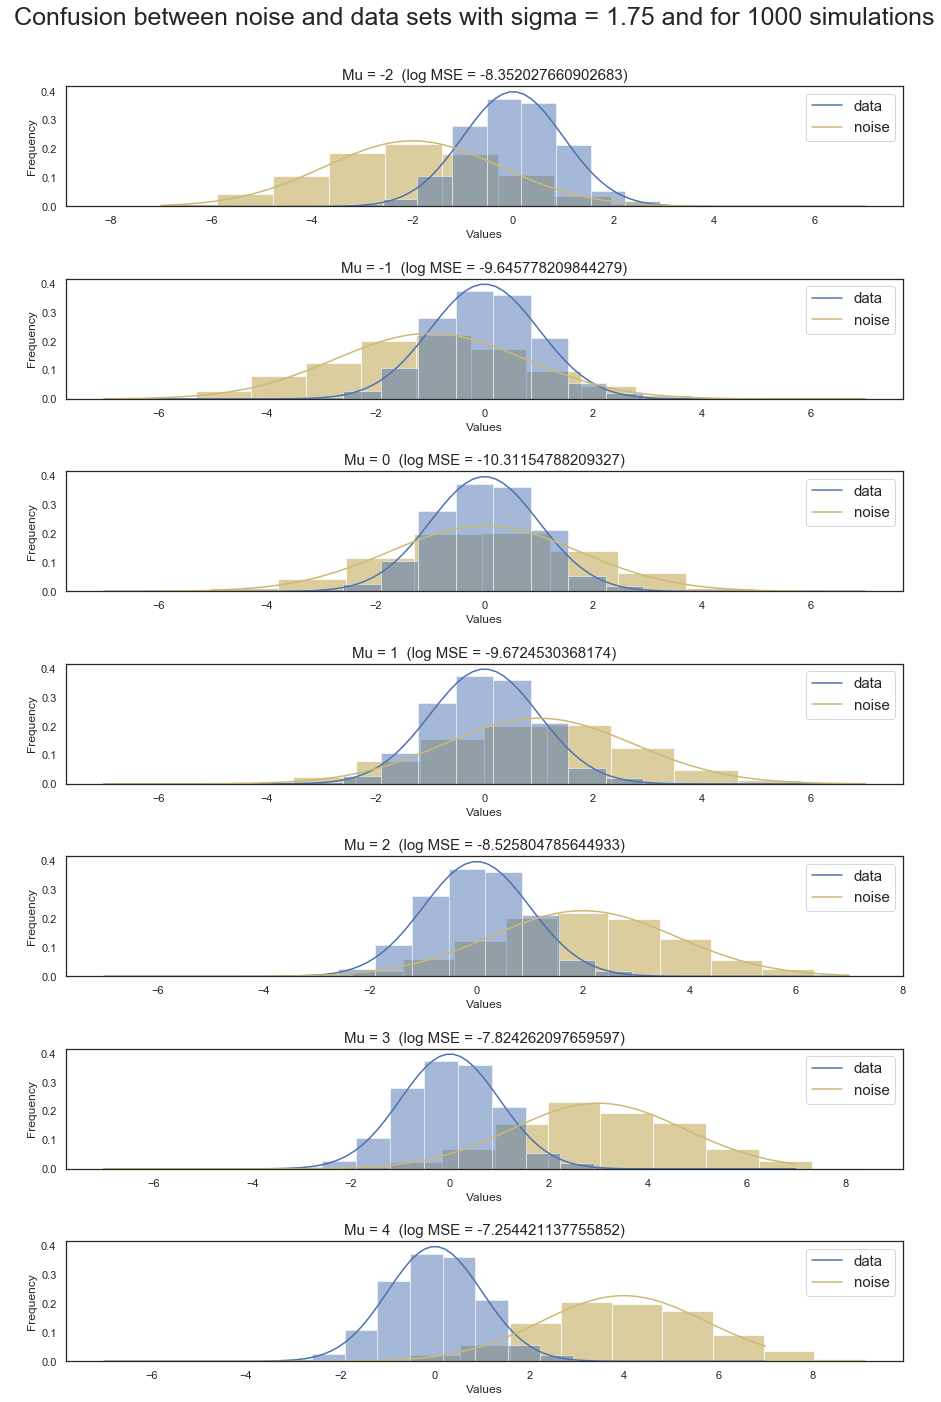

In [119]:
I= np.linspace(-7,7,100)
sns.set(style ="white")
np.random.seed(5)
fig_conf, axs_conf = plt.subplots(7,figsize=(15,22))

size_sample=1000
sigma=1.75
L = np.random.normal(0,1,size_sample)
#fig.tight_layout()
fig_conf.suptitle(" Confusion between noise and data sets with sigma = " + str(sigma) + " and for "  +str(size_sample) +" simulations", size= 25)
fig_conf.subplots_adjust(top = 0.93,hspace=0.6)
L_sigma_reduced=[0.5,1,2,3,4]
logquad= np.log(MSE1[:,np.argwhere(L_sigma==sigma)[0][0]])
j=0
for i in np.arange(-2,5,1):
    m= np.argwhere(L_mu==i)[0][0]
    axs_conf[j].set_title("Mu = "+str(i) + "  (log MSE = "+ str(logquad[m])+")", size= 15)
    axs_conf[j].plot(I, norm.pdf(I,0,1), '-b', label='data')
    axs_conf[j].plot(I, norm.pdf(I,i,sigma),'-y',label="noise")
    #axs[np.argwhere(L_sigma==i)[0][0]].plot(np.random.normal(3,i,16),[0]*16)
    axs_conf[j].hist(np.random.normal(i,sigma,size_sample),density=True,alpha=0.7,color='y')
    axs_conf[j].hist(L,density=True,color='b', alpha=0.5)
    axs_conf[j].legend(loc="upper right",prop={'size': 15})
    axs_conf[j].set_ylabel("Frequency")
    axs_conf[j].set_xlabel("Values")
    j=j+1

#### Remarks

* this last graph confirms our intuition. N(1,3) realisations are more confused than other distributions. So the  tougher the clssification,the better the estimation.
* That's why we had 

#### Limits:

* Our experiments highlight the fact that the most important criterion to optimize NCE and thus get a better estimation, is to simulate a noise which realisations are really confused with the dataset. If we know the data distribution we just have to simulate noise according the same distribution. However in practice we cannot always determine the distribution of a dataset. Then it is difficult to choose the right distribution. It is illustrated by Guttman's advice to choose the right law which is hazy. He advocates to sample a noise which is easy to sample, with a big size and which is similar to the data with repespect to covariance feature with data...
* That's why Generative models can be useful for estimation.
